In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
from sklearn.datasets import load_boston

data=load_boston(return_X_y=False)

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
df['Target']=data.target

In [6]:
X= df.drop(columns='Target')
Y=df['Target']

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=91)

In [8]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
lr.coef_

array([-1.59496437e-01,  4.99248313e-02,  2.89360229e-02,  9.19531894e-01,
       -1.75135848e+01,  3.70315495e+00,  1.04296178e-03, -1.58419514e+00,
        3.45143638e-01, -1.46359546e-02, -1.00320587e+00,  1.14201859e-02,
       -5.04826055e-01])

In [10]:
lr.intercept_


38.03553331945657

In [11]:
y_pred=lr.predict(X_test)

In [12]:
print('R2 score', r2_score(y_pred,y_test))

R2 score 0.6084733645630397


In [13]:
print('mean squared eroor',mean_squared_error(y_test,y_pred))

mean squared eroor 23.88491762482127


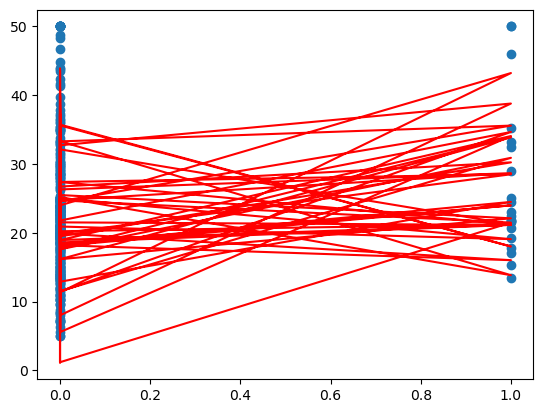

In [14]:
plt.scatter(X_train['CHAS'],y_train)
plt.plot(X_train['CHAS'],lr.predict(X_train),color='r')
plt.show()

In [15]:
from sklearn.linear_model import LassoCV,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


alphas=np.random.uniform(0,100,500)

# Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('lasso', LassoCV(alphas=alphas, cv=10, normalize=True))  # Step 2: LassoCV for Lasso regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)




C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LassoCV(alphas=array([5.86286099e+01, 2.86561780e+01, 9.65335239e+01, 9.50469191e+01,
       6.19319263e+01, 8.19540791e+01, 5.23683570e+01, 1.55577552e+01,
       3.79002478e+00, 1.11601695e+01, 4.10284684e+01, 6.87791609e+00,
       2.00467587e+01, 2.34072595e+01, 5.53932674e+01, 8.66318864e+01,
       8.35529006e+01, 8.79420697e+01, 4.510...
       3.25077149e+01, 5.61685911e+01, 2.03983800e+01, 5.14618299e+01,
       3.82542369e+01, 9.26019227e+01, 4.14933670e+01, 9.68252466e+01,
       6.24483862e+00, 8.27790289e+01, 9.60629776e+01, 9.40082667e+01,
       3.77281618e+01, 4.27484303e+01, 4.03988818e+01, 2.32720318e+01,
       5.42224311e+01, 5.37155563e+01, 5.52696966e+01, 9.09104829e+01,
       8.11387331e+01, 7.14727811e+01, 2.13464210e+01, 3.74964697e+01]),
                         cv=10, normalize=True))])

In [16]:
best_alpha = pipeline.named_steps['lasso'].alpha_
best_alpha

0.08610543502430845

In [17]:
Lasso=Lasso(alpha=best_alpha)
Lasso.fit(X_train,y_train)


Lasso(alpha=0.08610543502430845)

In [18]:
Lasso.coef_

array([-0.15243797,  0.05201255, -0.0445531 ,  0.        , -0.        ,
        3.66130555, -0.01286563, -1.28711158,  0.30210808, -0.01595925,
       -0.78338181,  0.01231445, -0.53661004])

In [19]:
Lasso.intercept_

26.217202807175234

In [20]:
y_pred=Lasso.predict(X_test)

In [21]:
print('R2 score', r2_score(y_pred,y_test))

R2 score 0.5637462580060608


In [22]:
print('mean squared eroor',mean_squared_error(y_test,y_pred))

mean squared eroor 25.587143315140967


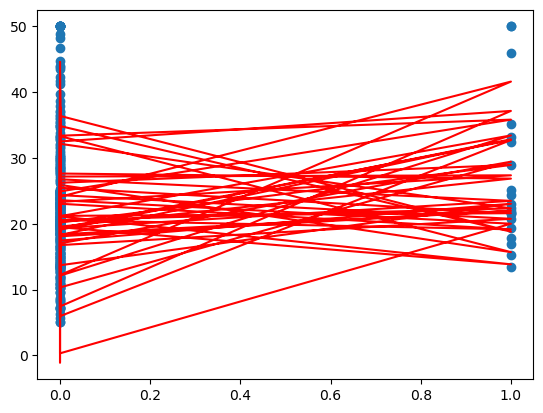

In [23]:
plt.scatter(X_train['CHAS'],y_train)
plt.plot(X_train['CHAS'],Lasso.predict(X_train),color='r')
plt.show()

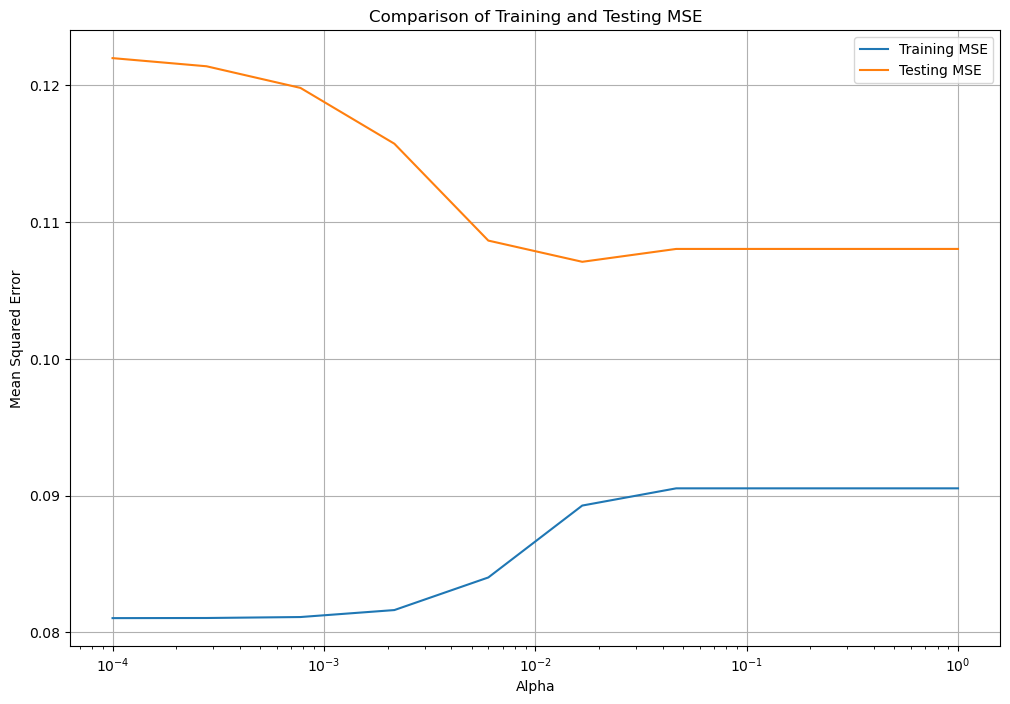

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store training and testing MSE
train_mse = []
test_mse = []

# Define a range of alpha values
alphas = np.logspace(-4, 0, num=10)

# Iterate over different alpha values
for alpha in alphas:
    # Create and train the Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Make predictions on the training and testing sets
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    # Calculate MSE for training and testing sets
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plotting the training and testing MSE against alpha
plt.figure(figsize=(12, 8))
plt.plot(alphas, train_mse, label='Training MSE')
plt.plot(alphas, test_mse, label='Testing MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Training and Testing MSE')
plt.legend()
plt.grid(True)
plt.show()